### importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('salary_prediction.csv')
data.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [55]:
data['Salary'].value_counts()

40000.0     31
50000.0     22
95000.0     22
180000.0    20
120000.0    20
90000.0     18
150000.0    18
45000.0     18
160000.0    17
60000.0     17
110000.0    17
170000.0    16
130000.0    14
100000.0    14
140000.0    14
35000.0     13
80000.0     12
55000.0     10
85000.0     10
70000.0      9
65000.0      9
105000.0     6
190000.0     4
75000.0      4
115000.0     3
250000.0     2
200000.0     2
135000.0     2
175000.0     2
125000.0     1
30000.0      1
220000.0     1
185000.0     1
145000.0     1
155000.0     1
350.0        1
Name: Salary, dtype: int64

In [17]:
data.isnull().sum()

Years of Experience    2
Salary                 2
dtype: int64

In [18]:
data = data.dropna()

In [19]:
data.isnull().sum()

Years of Experience    0
Salary                 0
dtype: int64

### Standardization

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [22]:
data_sc = sc.fit_transform(data)

In [23]:
data_sc = pd.DataFrame(data_sc, columns=(data.columns))

In [24]:
data_sc.head()

,Years of Experience,Salary
0,-0.768276,-0.219559
1,-1.073702,-0.738498
2,0.758859,1.025892
3,-0.462849,-0.842285
4,1.522426,2.063768


### Splitting IndeIndependent and dependent variable

In [25]:
x = np.array([data['Years of Experience']]) #independent variable
y = np.array([data['Salary']])         #dependent variable

x = x.reshape(-1,1)
y = y.reshape(-1,1)

### Splitting test,train values

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1)

In [27]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((335, 1), (38, 1), (335, 1), (38, 1))

## Building Model

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [29]:
lr = LinearRegression()

In [30]:
lr_mod = lr.fit(xtrain,ytrain)

In [31]:
lr_train_ypred = lr_mod.predict(xtrain)
lr_test_ypred = lr_mod.predict(xtest)

## Acurracy Check

In [32]:
from sklearn.metrics import r2_score

r2 = r2_score(ytrain, lr_train_ypred)
print("r2 score for training: ",r2)

r2 = r2_score(ytest, lr_test_ypred)
print("r2 score for testing: ",r2)

r2 score for training:  0.8684668943808689
r2 score for testing:  0.8339544501213114


In [46]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(xtrain)
x_test_trans = poly.transform(xtest)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, ytrain)
y_pred_test = lr.predict(x_test_trans)
y_pred_train = lr.predict(x_train_trans)
print("r2 score for training: ",r2_score(ytrain, y_pred_train))
print("r2 score for testing: ",r2_score(ytest, y_pred_test))

r2 score for training:  0.86941173009961
r2 score for testing:  0.8421907660395229


## Finding Relation through graphs

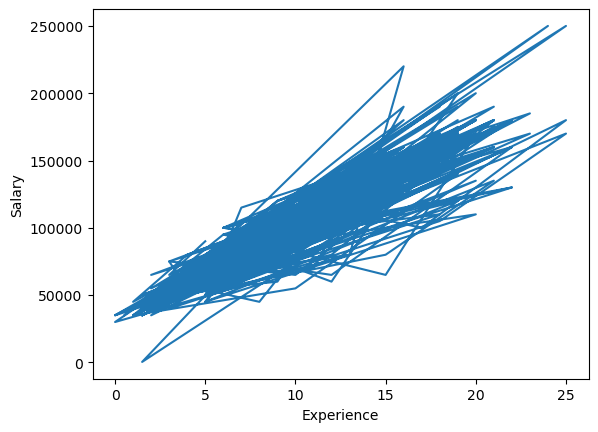

In [52]:
plt.plot(data['Years of Experience'],data['Salary'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

From the above visual, we can conclude that salary is directly proportional to experience 